In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("./Housing.csv")

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
x = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [15]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
y 

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [20]:
## TrainTest Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished
363,3584,2,1,1,yes,no,no,yes,no,0,no,semi-furnished
370,4280,2,1,1,yes,no,no,no,yes,2,no,semi-furnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
113,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [22]:
y_train

,price
126,5880000
363,3710000
370,3640000
31,8400000
113,6083000
...,...
71,6755000
106,6160000
270,4340000
435,3290000


In [26]:
# Install CatBoost
# pip install catboost

import catboost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Assume you have a dataset with features (X) and target variable (y)
# X should include both numerical and categorical features

# Create a CatBoostRegressor instance
catboost_model = CatBoostRegressor(iterations=100,  # Number of trees (boosting iterations)
                                   depth=6,         # Maximum depth of the tree
                                   learning_rate=0.1,  # Step size shrinkage during training
                                   loss_function='RMSE',  # Loss function for regression task
                                   cat_features=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","prefarea", "furnishingstatus"])  # Specify categorical features

# Train the model on the training data
catboost_model.fit(x_train, y_train, verbose=10)  # Set verbose to monitor the training process

# Make predictions on the test data
predictions = catboost_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {mse}')

0:	learn: 1690103.2896020	total: 58ms	remaining: 5.74s
10:	learn: 1203323.5961008	total: 67.7ms	remaining: 548ms
20:	learn: 1002130.2524525	total: 73.7ms	remaining: 277ms
30:	learn: 902761.4480582	total: 79.8ms	remaining: 178ms
40:	learn: 840738.9335795	total: 86.6ms	remaining: 125ms
50:	learn: 796053.2751635	total: 92.6ms	remaining: 89ms
60:	learn: 758617.8229645	total: 98.3ms	remaining: 62.9ms
70:	learn: 722599.9266425	total: 103ms	remaining: 42.1ms
80:	learn: 694796.5553087	total: 107ms	remaining: 25.2ms
90:	learn: 664705.7235888	total: 112ms	remaining: 11.1ms
99:	learn: 644871.2890305	total: 117ms	remaining: 0us
Mean Squared Error on Test Data: 1492415058158.976


In [27]:
predictions

array([ 5453949.76237245,  7074966.20626017,  3510746.70521372,
        4267363.15563743,  3690167.21841209,  4012060.16505171,
        5402040.84431211,  5548531.28705482,  3020714.3036166 ,
        3013313.40199542, 10314579.56403278,  2970926.64919457,
        3127248.09518048,  3606889.86144858,  3766323.84738872,
        4817642.33464263,  3195221.5128878 ,  4936324.78372052,
        4498173.47393278,  4080850.29674164,  5510753.1559954 ,
        5746898.75469038,  2807672.94342114,  4384294.97324353,
        5181154.4171387 ,  7306967.61054069,  3524753.57142526,
        4628065.41003942,  7287722.20295876,  3392201.47481865,
        5764641.32653742,  3125623.94983369,  6679812.50399631,
        4806304.82809887,  3148738.37423884,  5834839.30831983,
        5508395.58118296,  3624878.06362653,  3174764.50180338,
        4302200.92541413,  4826863.95757664,  3185551.8449956 ,
        7079119.25695517,  4253177.16153399,  4209632.40267047,
        4076426.8383414 ,  6874852.11062

In [28]:
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
395,3500000
425,3360000
195,4970000
452,3150000


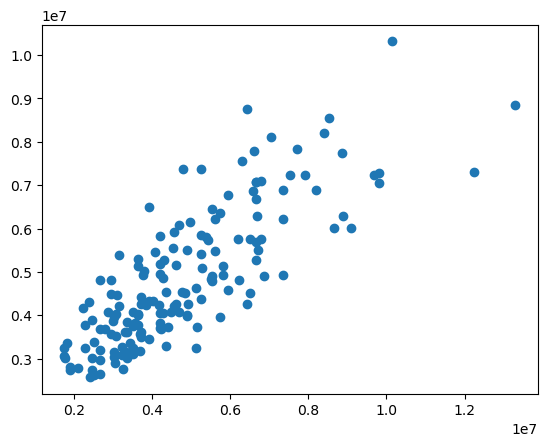

In [29]:
## Evaluation using scatter plot

plt.scatter( y_test, predictions)

In [47]:
new_data = x_train.iloc[:1,:]

In [48]:
new_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished


In [49]:
new_predictions = catboost_model.predict(new_data)

In [50]:
new_predictions

array([5606966.61802944])

In [51]:
import pickle

In [52]:
pickle.dump(catboost_model, open('catboost_model.pkl','wb'))

In [53]:
pickled_model = pickle.load(open('catboost_model.pkl','rb'))

In [54]:
pickled_model.predict(new_data)

array([5606966.61802944])